# Demonstration of $K$-means algorithm for images

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 11 October 2018**  
**Project Github: https://github.com/joyfuldahye/MFCVML_Assignments/tree/master/Assignment04**  

--------------------------------------------------------------------------

# Requirements  



**Programming Assignment: $k$-means algorithm**  
* Implement a $k$-means algorithm for images  
* Apply the $k$-means algorithm on MNIST dataset. 
* Demonstrate the $k$-means algorithm with varying $k$'s  
* Compute the accuracy with $k$ = 10


**Essential Functions: $k$-means algorithm**  
* computeDistance: (a pair of images)  
* initialiseLabel: (number of clusters)  
* computeCentroid: (number of clusters)  
* assignLabel: (number of clusters, list of distances)  
* computeEnergy: (list of data, list of labels)  
* computeAccuracy: (list of true labels, list of labels)


**Essential Visualisation: $k$-means algorithm**  
* Initial centroid images  
* Final centroid images  
* Energy per each iteration  
* Accuracy per each iteration  

> Source codes are slightly modified to execute them with sample (n = 2,000) since processing the algorithm with the original data takes a considerable length of time in the environment of the computer where they are executed. **The original version of source codes are attached in the last part of this report.**

# Define functions

## Read data and define variables needed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_data   = "./mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

#num_image   = len(data) # original data length
num_image = 2000 # data length for debugging
count       = 0     # count for the number of images

## Define a function to normalize data to process data

In [2]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

## Create image vectors and the list of label  
* list_label is a list which consists of a label of each row. It's the first element of each row in the file.
  * Its type is int.  
* list_image is a matrix (list of list) which represents the characteristics of each image.  
  * its every single element (nested list) represents the characteristics of each image.

In [3]:
#
# make a matrix each column of which represents an images in a vector form 
#

list_image  = np.empty((size_row * size_col, num_image), dtype=float)# represents each image in vector form
list_label  = np.empty(num_image, dtype=int)

#for line in data: # original loop
for line in data[:2000]: # for debugging

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector
    

    count += 1

In [4]:
img_char = list_image.shape[0] # dh: the number of row of list_image vector: 784
cnum = list_image.shape[1] # dh: the number of column number of list_image vector: 10000

## Define a function to randomly assign initial labels to each image

In [5]:
def initialiseLabel(num_image, k):
    labels = [] 
    for i in range(num_image):
        labels.append(np.random.choice(range(k)))
    return labels

## Define a function to compute centroids with given points and labels: $Z_j = (1/|G_j|)\displaystyle\sum_{i\in G_j}X_i$  
* $G_j$ represents clustered group j. 
* $Z_j$ represents the centroid of group j.  
* $X_i$ represents $i^{th}$ image.  
* $G_j$, $Z_j$, $X_i$ are vector.


In [6]:
def computeCentroid(list_image, labels, k):
    centroids = []
    
    for label in range(k):
        label_data = [] # contains info of each columns
        
        # dh: iterate each row which represents each cell of an image
        for ic in range(img_char):
            # contains info of each each list_image's treat in icth row
            label_data_array = []
            
            for i in range(num_image):
                if labels[i] == label: # check if img's label matches with k
                    label_data_array.append(list_image[ic][i])
                    
            label_data.append(label_data_array)
            
        means = [] # contains info of each columns' mean at each label
        
        for m in range(img_char):
            means.append(np.mean(label_data[m]))
        
        centroids.append(means)
       
    return centroids

## Define a function to compute distance between  each image and each centroid: $distances_{ij}= \Vert X_i - Z_j\Vert$  

In [7]:
def distance(d):

    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [8]:
def distanceToCentroids(list_image, centroids):
    # distances contains all distance info
    distances = []
    for centroid in centroids:
        distance_k = []
        for i in range(num_image):
            distance_img = []
            for ic in range(img_char):
                distance_cent = (list_image[ic][i] - centroid[ic])**2
                distance_img.append(distance_cent)
            d = distance(distance_img)
            distance_k.append(d)
        distances.append(distance_k)
    return distances

## Define a function to cluster data into the group which has the closest centroid to the data

In [9]:
def assignLabel(distances):
    # compute the closest centroid labels using pandas
    df = pd.DataFrame(np.array(distances).reshape(k, num_image)) # for debugging
    closest_cent = pd.DataFrame(df.idxmin()).values
    new_labels = np.concatenate(closest_cent)
    return new_labels

## Define a function to compute energy: $J_j = (1/N)\displaystyle\sum_{i\in G_j}\Vert X_i - Z_j\Vert^2$  
* $N$ represents the total number of image data.

In [10]:
def computeEnergy(distances, labels):
    J = 0
    N = num_image
    for i in range(N):
        # distance has info distances between ith data and each centroid
        img_label = labels[i]
        # find the data label's centroid distance
        distance_k = distances[img_label][i]
        J = J + distance_k ** 2 
    J = J / N
    return J

# Define a function to compute accuracy: $Accuracy = \frac{the \ number \ of \  data \ correctly \ classified}{the \ number \ of \ data}$

In [11]:
def clusteredResult(k, labels):
    clustered_result = []
    for k in range(k):
        clustered_k = []
        for i in range(len(labels)):
            if labels[i] == k:
                clustered_k.append(list_label[i])
        clustered_result.append(clustered_k)
    return clustered_result

def findFrequentLabel(k, clustered_result):
    frequent_labels = []
    for k in range(k):
        frequent_label = np.bincount(clustered_result[k]).argmax()
        frequent_labels.append(frequent_label)
    return frequent_labels

def computeAccuracy(k, clustered_result, frequent_labels):
    accuracies = []
    frequency_num = 0
    for i in range(k):
        fl = frequent_labels[i]
        cr = clustered_result[i]
        frequency_num += cr.count(fl)
    accuracy = frequency_num/num_image
    return accuracy
    

## Repeat clustering until centroids do not change
* Compute energy at every iteration  
* Compute accuracy at every iteration

In [12]:
def cluster(k, list_image, init_labels):
    energies = []
    accuracies = []
    # Until centroids do not change,
    # repeat computing new centroids and assigning new labels to the points with the centroids
    prev_centroids = computeCentroid(list_image, init_labels, k)
    prev_distances = distanceToCentroids(list_image, prev_centroids)
    prev_labels = assignLabel(prev_distances)
    while True:
        new_centroids = computeCentroid(list_image, prev_labels, k)
        distances = distanceToCentroids(list_image, new_centroids)
        new_labels = assignLabel(distances)
        #rounded_prev_cent = list(np.around(np.array(prev_centroids), 2)) # for debugging
        #rounded_new_cent = list(np.around(np.array(new_centroids), 2)) # for debugging

        # When centroids do not change any more, break this loop
        if prev_centroids == new_centroids:
        #if rounded_prev_cent == rounded_new_cent: # for debugging
            break
            
        prev_centroids = new_centroids
        prev_labels = new_labels
        
        # Compute energy 
        energy = computeEnergy(distances, new_labels)
        energies.append(energy)
        
        # Compute accuracy
        clustered_result = clusteredResult(k, new_labels)
        frequent_labels = findFrequentLabel(k, clustered_result)
        accuracy = computeAccuracy(k, clustered_result, frequent_labels)
        accuracies.append(accuracy)
        
        
        result = {'energies': energies,
                  'accuracies': accuracies,
                  'prev_centroids': prev_centroids,
                 'prev_labels': prev_labels,
                 'frequent_labels': frequent_labels}
    return result

## Plot images and graphs

In [13]:
def plotCentroids(k, centroids, labels):
    centroids_np = np.array(centroids).reshape(k, 784)
    
    for i in range(k):
        plt.subplot(1, k, i+1)
        if centroids == init_centroids:
            plt.title(i)
        else:
            plt.title(labels[i])
        plt.imshow(centroids_np[i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    
    if centroids == init_centroids:
        print(f"Initial Centroids with K={k}")
    else:
        print(f"Final Centroids with K={k}")
    plt.show()
    

In [14]:
def plotEnergies(energies):
    plt.plot(energies, marker='o', label='energy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [15]:
def plotAccuracies(accuracies):
    plt.plot(accuracies, color = 'g', marker='o', label='accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

# Execution with sameple (n = 2,000 )

## Iterate $K$-means algorithm manipulation functions to cluster MNIST above from $K=2$ to $K=10$

************************************************************
When k is 2:
Initial Centroids with K=2


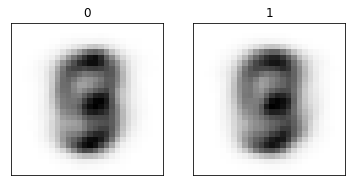

Final Centroids with K=2


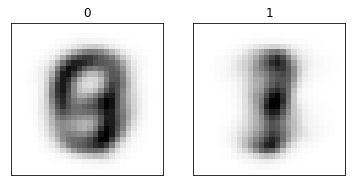

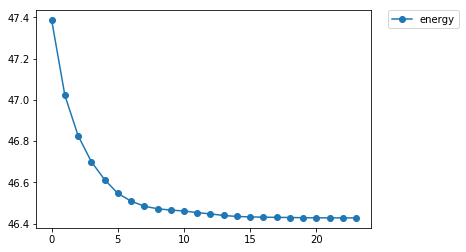

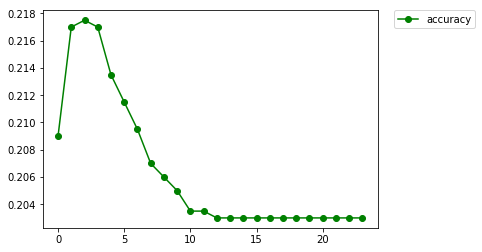

************************************************************
When k is 3:
Initial Centroids with K=3


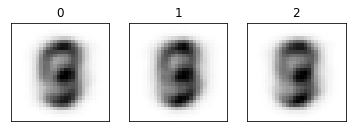

Final Centroids with K=3


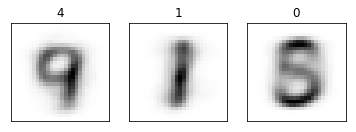

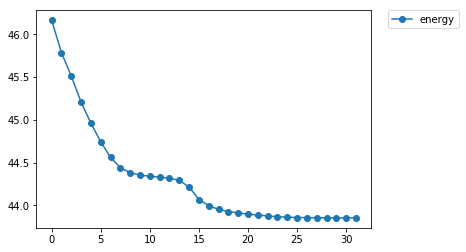

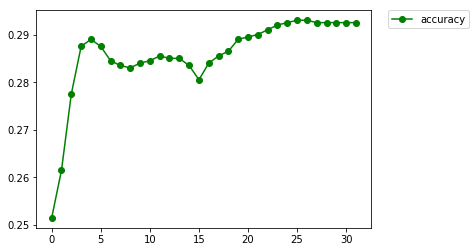

************************************************************
When k is 4:
Initial Centroids with K=4


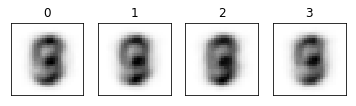

Final Centroids with K=4


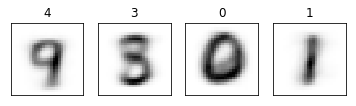

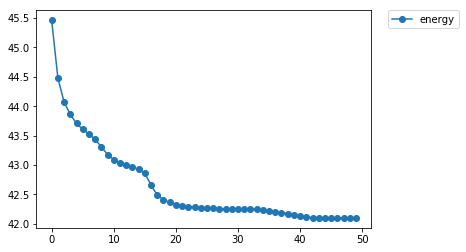

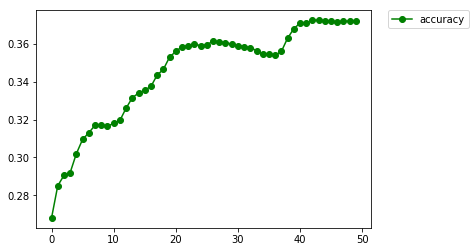

************************************************************
When k is 5:
Initial Centroids with K=5


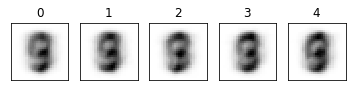

Final Centroids with K=5


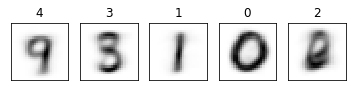

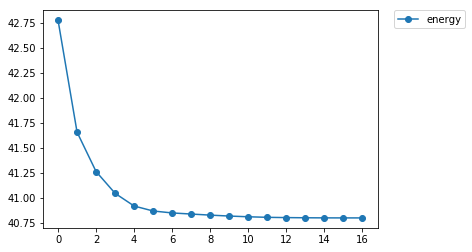

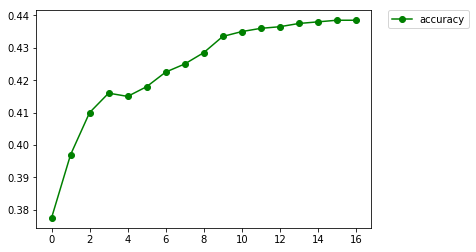

************************************************************
When k is 6:
Initial Centroids with K=6


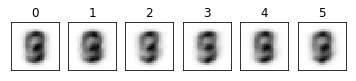

Final Centroids with K=6


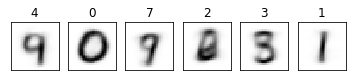

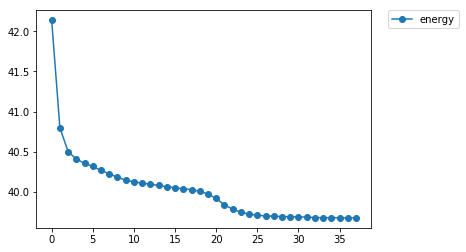

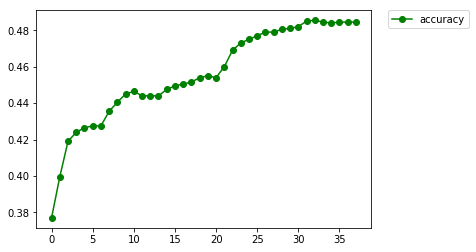

************************************************************
When k is 7:
Initial Centroids with K=7


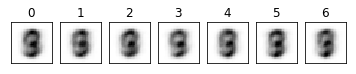

Final Centroids with K=7


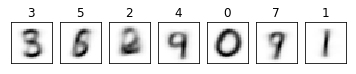

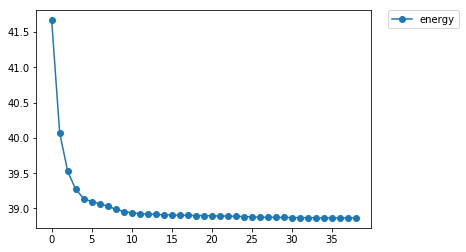

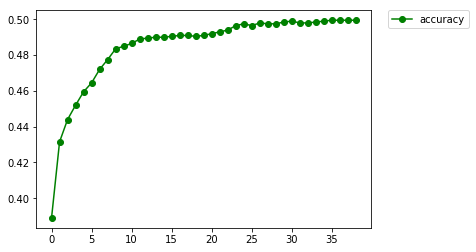

************************************************************
When k is 8:
Initial Centroids with K=8


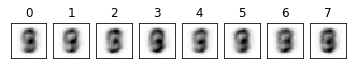

Final Centroids with K=8


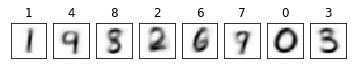

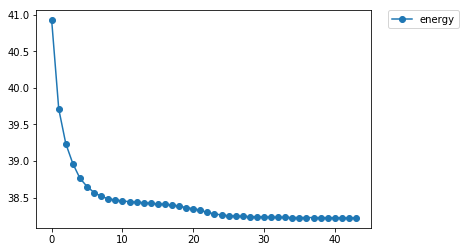

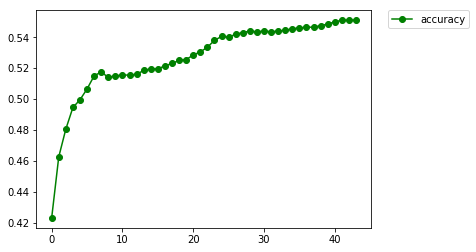

************************************************************
When k is 9:
Initial Centroids with K=9


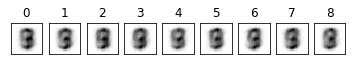

Final Centroids with K=9


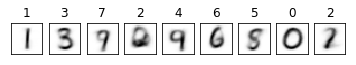

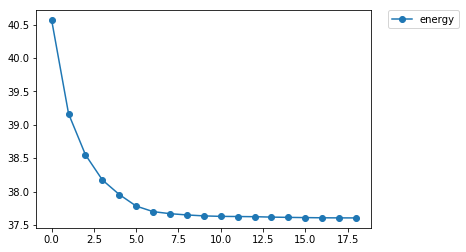

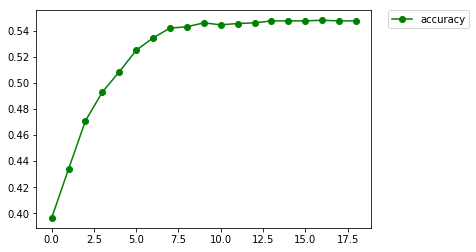

************************************************************
When k is 10:
Initial Centroids with K=10


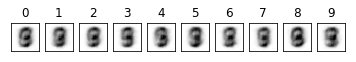

Final Centroids with K=10


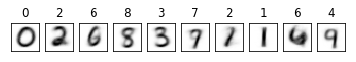

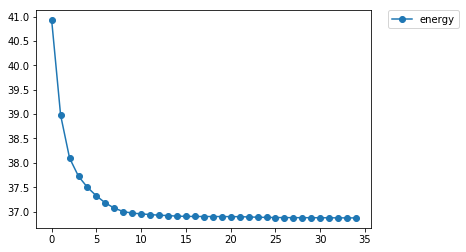

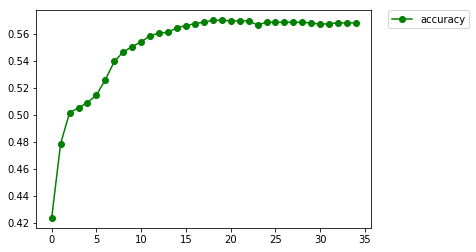

In [16]:
for k in range(2, 11):
    print("************************************************************")
    print(f"When k is {k}:")

    # initialize labels and centroids
    init_labels = initialiseLabel(num_image, k)
    init_centroids = computeCentroid(list_image, init_labels, k)

    # execute clustering
    result = cluster(k, list_image, init_labels)
    prev_centroids = result['prev_centroids']
    energies = result['energies']
    prev_labels = result['prev_labels']
    accuracies = result['accuracies']
    frequent_labels = result['frequent_labels']

    # plot images and energy graph
    plotCentroids(k, init_centroids, frequent_labels)
    plotCentroids(k, prev_centroids, frequent_labels)
    plotEnergies(energies)
    plotAccuracies(accuracies)

**Image**
> * The initial images are far more blurred than the final ones.  
> * The larger the size of K, the clearer the final images become.

**Engery**
> * The energy has decreased at each clustering until clustering is finished. A striking feature of the enegy movment is that at the very begining, a gradient between the previous energy and the new one is large and it has become flatter as the clustering is proceeding.  
> * The final energy of each k has tendency to become smaller as the size of K increases. 

**Accuracy**
> * The accuracy has increased at each clustering. It's notable that the accuracy significantly skyrockets at the first few clusterings and it becomes flatter as the clustering is being processed.  
> * The final accuracy of each k has a tendency to go up as the size of K increases. 
> * When the size of K is relatively small, the energy movement tends to more fluctuate than when it's larger.

# The original version of source code with all data

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_data   = "./mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data) # original data length
#num_image = 2000 # data length for debugging
count       = 0     # count for the number of images

In [23]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

In [24]:
#
# make a matrix each column of which represents an images in a vector form 
#

list_image  = np.empty((size_row * size_col, num_image), dtype=float)# represents each image in vector form
list_label  = np.empty(num_image, dtype=int)

for line in data: # original loop
#for line in data[:2000]: # for debugging

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector
    

    count += 1

In [25]:
img_char = list_image.shape[0] # dh: the number of row of list_image vector: 784
cnum = list_image.shape[1] # dh: the number of column number of list_image vector: 10000

In [26]:
def initialiseLabel(num_image, k):
    labels = [] 
    for i in range(num_image):
        labels.append(np.random.choice(range(k)))
    return labels

In [27]:
def computeCentroid(list_image, labels, k):
    centroids = []
    
    for label in range(k):
        label_data = [] # contains info of each columns
        
        # dh: iterate each row which represents each cell of an image
        for ic in range(img_char):
            # contains info of each each list_image's treat in icth row
            label_data_array = []
            
            for i in range(num_image):
                if labels[i] == label: # check if img's label matches with k
                    label_data_array.append(list_image[ic][i])
                    
            label_data.append(label_data_array)
            
        means = [] # contains info of each columns' mean at each label
        
        for m in range(img_char):
            means.append(np.mean(label_data[m]))
        
        centroids.append(means)
       
    return centroids

In [28]:
def distance(d):

    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [29]:
def distanceToCentroids(list_image, centroids):
    # distances contains all distance info
    distances = []
    for centroid in centroids:
        distance_k = []
        for i in range(num_image):
            distance_img = []
            for ic in range(img_char):
                distance_cent = (list_image[ic][i] - centroid[ic])**2
                distance_img.append(distance_cent)
            d = distance(distance_img)
            distance_k.append(d)
        distances.append(distance_k)
    return distances

In [30]:
def assignLabel(distances):
    # compute the closest centroid labels using pandas
    df = pd.DataFrame(np.array(distances).reshape(k, num_image)) # for debugging
    closest_cent = pd.DataFrame(df.idxmin()).values
    new_labels = np.concatenate(closest_cent)
    return new_labels

In [31]:
def computeEnergy(distances, labels):
    J = 0
    N = num_image
    for i in range(N):
        # distance has info distances between ith data and each centroid
        img_label = labels[i]
        # find the data label's centroid distance
        distance_k = distances[img_label][i]
        J = J + distance_k ** 2 
    J = J / N
    return J

In [32]:
def clusteredResult(k, labels):
    clustered_result = []
    for k in range(k):
        clustered_k = []
        for i in range(len(labels)):
            if labels[i] == k:
                clustered_k.append(list_label[i])
        clustered_result.append(clustered_k)
    return clustered_result

def findFrequentLabel(k, clustered_result):
    frequent_labels = []
    for k in range(k):
        frequent_label = np.bincount(clustered_result[k]).argmax()
        frequent_labels.append(frequent_label)
    return frequent_labels

def computeAccuracy(k, clustered_result, frequent_labels):
    accuracies = []
    frequency_num = 0
    for i in range(k):
        fl = frequent_labels[i]
        cr = clustered_result[i]
        frequency_num += cr.count(fl)
    accuracy = frequency_num/num_image
    return accuracy
    

In [33]:
def cluster(k, list_image, init_labels):
    energies = []
    accuracies = []
    # Until centroids do not change,
    # repeat computing new centroids and assigning new labels to the points with the centroids
    prev_centroids = computeCentroid(list_image, init_labels, k)
    prev_distances = distanceToCentroids(list_image, prev_centroids)
    prev_labels = assignLabel(prev_distances)
    while True:
        new_centroids = computeCentroid(list_image, prev_labels, k)
        distances = distanceToCentroids(list_image, new_centroids)
        new_labels = assignLabel(distances)
        #rounded_prev_cent = list(np.around(np.array(prev_centroids), 2)) # for debugging
        #rounded_new_cent = list(np.around(np.array(new_centroids), 2)) # for debugging

        # When centroids do not change any more, break this loop
        if prev_centroids == new_centroids:
        #if rounded_prev_cent == rounded_new_cent: # for debugging
            break
            
        prev_centroids = new_centroids
        prev_labels = new_labels
        
        # Compute energy 
        energy = computeEnergy(distances, new_labels)
        energies.append(energy)
        
        # Compute accuracy
        clustered_result = clusteredResult(k, new_labels)
        frequent_labels = findFrequentLabel(k, clustered_result)
        accuracy = computeAccuracy(k, clustered_result, frequent_labels)
        accuracies.append(accuracy)
        
        
        result = {'energies': energies,
                  'accuracies': accuracies,
                  'prev_centroids': prev_centroids,
                 'prev_labels': prev_labels,
                 'frequent_labels': frequent_labels}
    return result

In [34]:
def plotCentroids(k, centroids, labels):
    centroids_np = np.array(centroids).reshape(k, 784)
    
    for i in range(k):
        plt.subplot(1, k, i+1)
        if centroids == init_centroids:
            plt.title(i)
        else:
            plt.title(labels[i])
        plt.imshow(centroids_np[i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    
    if centroids == init_centroids:
        print(f"Initial Centroids with K={k}")
    else:
        print(f"Final Centroids with K={k}")
    plt.show()
    

In [35]:
def plotEnergies(energies):
    plt.plot(energies, marker='o', label='energy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [36]:
def plotAccuracies(accuracies):
    plt.plot(accuracies, color = 'g', marker='o', label='accuracy')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [ ]:
for k in range(2, 11):
    print("************************************************************")
    print(f"When k is {k}:")

    # initialize labels and centroids
    init_labels = initialiseLabel(num_image, k)
    init_centroids = computeCentroid(list_image, init_labels, k)

    # execute clustering
    result = cluster(k, list_image, init_labels)
    prev_centroids = result['prev_centroids']
    energies = result['energies']
    prev_labels = result['prev_labels']
    accuracies = result['accuracies']
    frequent_labels = result['frequent_labels']

    # plot images and energy graph
    plotCentroids(k, init_centroids, frequent_labels)
    plotCentroids(k, prev_centroids, frequent_labels)
    plotEnergies(energies)
    plotAccuracies(accuracies)

## Execution of the original source code with $K=10$

************************************************************
When k is 10:
Initial Centroids with K=10


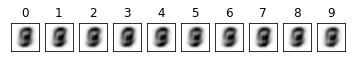

Final Centroids with K=10


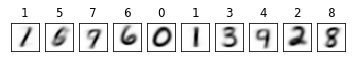

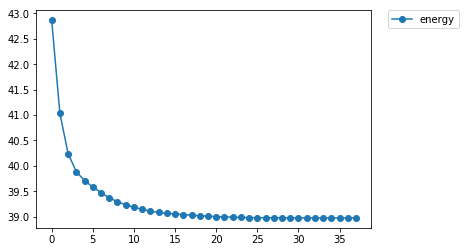

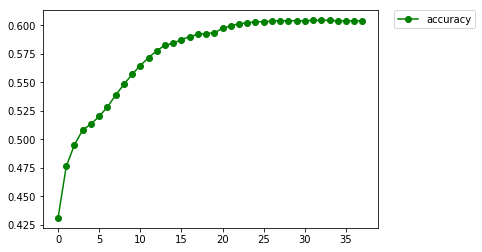

In [37]:
k = 10
print("************************************************************")
print(f"When k is {k}:")

# initialize labels and centroids
init_labels = initialiseLabel(num_image, k)
init_centroids = computeCentroid(list_image, init_labels, k)

# execute clustering
result = cluster(k, list_image, init_labels)
prev_centroids = result['prev_centroids']
energies = result['energies']
prev_labels = result['prev_labels']
accuracies = result['accuracies']
frequent_labels = result['frequent_labels']

# plot images and energy graph
plotCentroids(k, init_centroids, frequent_labels)
plotCentroids(k, prev_centroids, frequent_labels)
plotEnergies(energies)
plotAccuracies(accuracies)

> When the number of data is 10,000, the result shows higher the accuracy than when that of data is 2,000. This indicates that the larger the the total number of data is, the higher the accuracy of $K$-means algorithms becomes. 